# Interacción básica con el Completions API de OpenAI (legacy)

Completions API (Legacy)
https://platform.openai.com/docs/api-reference/completions

In [ ]:
# prompt: read OPENAI_API_KEY from colab secrets

import os
from google.colab import userdata

# Use userdata.get() to retrieve the secret
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
from openai import OpenAI
client = OpenAI(

)

response = client.chat.completions.create(
                model="gpt-4.1-mini", # mini...
                messages=[
                        {"role": "system", "content": "always write in English"},
                          {"role": "user", "content": "Cuéntame un haiku"}
                          ]
            )


print(response)


APIConnectionError: Connection error.

In [ ]:
print(response.model_dump_json(indent=2))

{
  "id": "chatcmpl-Cg6KzwqjudgRrBgMdYFHYDaeJZ0r9",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "Silent moon above,  \nWhispers dance on twilight breeze,  \nNight’s soft lullaby.",
        "refusal": null,
        "role": "assistant",
        "annotations": [],
        "audio": null,
        "function_call": null,
        "tool_calls": null
      }
    }
  ],
  "created": 1764150173,
  "model": "gpt-4.1-mini-2025-04-14",
  "object": "chat.completion",
  "service_tier": "default",
  "system_fingerprint": "fp_9766e549b2",
  "usage": {
    "completion_tokens": 19,
    "prompt_tokens": 21,
    "total_tokens": 40,
    "completion_tokens_details": {
      "accepted_prediction_tokens": 0,
      "audio_tokens": 0,
      "reasoning_tokens": 0,
      "rejected_prediction_tokens": 0
    },
    "prompt_tokens_details": {
      "audio_tokens": 0,
      "cached_tokens": 0
    }
  }
}


In [ ]:
print(response.choices[0].message.content)

Silent moon above,  
Whispers dance on twilight breeze,  
Night’s soft lullaby.


Los modelos, por defecto, no recuerdan el histórico de la conversación

In [ ]:
response = client.chat.completions.create(
                model="gpt-4.1-mini", # mini...
                messages=[
                      {"role": "system", "content": "always write in English"},
                          {"role": "user", "content": "Repite el haiku anterior"}
                        ]
            )

print(response.choices[0].message.content)

I’m sorry, but I don’t have access to the previous haiku. Could you please provide it again?


In [ ]:
# load from .env
# import dotenv
# dotenv.load_dotenv()

**Completions API Chatbot**

https://github.com/juananpe/stateful-openai-chatbots/blob/main/statefulchat-old.py

In [ ]:
client = OpenAI(

)

def main():
   print("Stateful Chatbot (Completions API, type 'exit' to quit)")
   model = "gpt-4o-mini"
   conversation = [
       {"role": "system", "content": "You are a helpful assistant."}
   ]
   while True:
       user_input = input("You: ")
       if user_input.lower() in {"exit", "quit"}:
           print("Goodbye!")
           break
       conversation.append({"role": "user", "content": user_input})
       try:
           response = client.chat.completions.create(
               model=model,
               messages=conversation
           )
           text = response.choices[0].message.content.strip()
           print(f"Bot: {text}")
           conversation.append({"role": "assistant", "content": text})
       except Exception as e:
           print(f"Error: {e}")


In [ ]:
main()

Stateful Chatbot (Completions API, type 'exit' to quit)
You: quit
Goodbye!


**OpenAI Reponses API**

https://platform.openai.com/docs/api-reference/responses

In [ ]:
from openai import OpenAI

client = OpenAI(
)

response = client.responses.create(
  model="gpt-4.1",
  instructions = "always write in english",
  input="Cuéntame en tres líneas un cuento de un unicornio."

)

print(response.model_dump_json(indent=2))

{
  "id": "resp_043198ab9e0f0bc1006926ced56ca8819fa85312c54fb9b813",
  "created_at": 1764150997.0,
  "error": null,
  "incomplete_details": null,
  "instructions": "always write in english",
  "metadata": {},
  "model": "gpt-4.1-2025-04-14",
  "object": "response",
  "output": [
    {
      "id": "msg_043198ab9e0f0bc1006926ced61174819faf6030f67afa4372",
      "content": [
        {
          "annotations": [],
          "text": "A magical unicorn named Lumina lived in a hidden rainbow forest. One day, she used her sparkling horn to heal a wounded bird. Grateful, the bird became her lifelong friend and travel companion.",
          "type": "output_text",
          "logprobs": []
        }
      ],
      "role": "assistant",
      "status": "completed",
      "type": "message"
    }
  ],
  "parallel_tool_calls": true,
  "temperature": 1.0,
  "tool_choice": "auto",
  "tools": [],
  "top_p": 1.0,
  "background": false,
  "conversation": null,
  "max_output_tokens": null,
  "max_tool_calls"

In [ ]:
print(response.output_text)

# computed property,
# see: https://github.com/openai/openai-python/blob/71dedfad6716c241744d3bd856370e8c59e75500/src/openai/types/responses/response.py#L278


A magical unicorn named Lumina lived in a hidden rainbow forest. One day, she used her sparkling horn to heal a wounded bird. Grateful, the bird became her lifelong friend and travel companion.


Equivalente, usando roles


In [ ]:
from openai import OpenAI
client = OpenAI(

)

response = client.responses.create(
    model="gpt-4.1",
    max_output_tokens = 1_000,
    input=[
        {
            "role": "developer",
            "content": "escribe siempre en inglés"
        },
        {
            "role": "user",
            "content": "Cuéntame en tres líneas un cuento de un unicornio."
        }
    ]
)

print(response.output_text)

A lonely unicorn wandered through an enchanted forest, searching for a friend. One day, she found a rainbow, and at its end, met a kind young fox. Together, they brought magic and laughter to the whole forest forever.


**Chatbot básico, Responses API**

Almacenando el estado de la conversación:

In [ ]:
from openai import OpenAI

client = OpenAI()

history = [
    {"role": "user", "content": "tell me a joke"}
]

# First response
response = client.responses.create(
    model="gpt-4o-mini",
    input=history
)

bot_reply = response.output_text
print(bot_reply)

# Add assistant reply to history
history.append({
    "role": "assistant",
    "content": bot_reply
})

# Add next user message
history.append({
    "role": "user",
    "content": "tell me another"
})

print(f"\nHistory:\n{history}\n")

# Second response
second_response = client.responses.create(
    model="gpt-4o-mini",
    input=history
)

print(second_response.output_text)


Why did the scarecrow win an award?

Because he was outstanding in his field!

History:
[{'role': 'user', 'content': 'tell me a joke'}, {'role': 'assistant', 'content': 'Why did the scarecrow win an award?\n\nBecause he was outstanding in his field!'}, {'role': 'user', 'content': 'tell me another'}]

Why don’t skeletons fight each other?

They don’t have the guts!


In [ ]:
def main():
    print("Stateful Chatbot (Responses API, type 'exit' to quit)")
    model = "gpt-4o-mini"

    # Keep the same initial system prompt
    conversation = [
        {"role": "system", "content": "You are a helpful assistant."}
    ]

    while True:
        user_input = input("You: ")
        if user_input.strip().lower() in {"exit", "quit"}:
            print("Goodbye!")
            break

        # Add user message
        conversation.append({"role": "user", "content": user_input})

        try:
            # Use Responses API with the conversation as input
            response = client.responses.create(
                model=model,
                input=conversation,
                # Match the intent of max_tokens from Chat Completions
                max_output_tokens=10_000,
                store=False,
            )

            # Use the computed property to get plain text
            bot_text = (response.output_text or "").strip()

            print(f"Bot: {bot_text}")

            # Add assistant reply back into the running conversation
            conversation.append({"role": "assistant", "content": bot_text})

        except Exception as e:
            print(f"Error: {e}")

In [ ]:
main()


Stateful Chatbot (Responses API, type 'exit' to quit)
You: hi! I'm Juanan
Bot: Hi Juanan! How can I assist you today?
You: do you remember my name?
Bot: Yes, you mentioned that your name is Juanan. How can I help you today?
You: quit
Goodbye!


# Multimodal

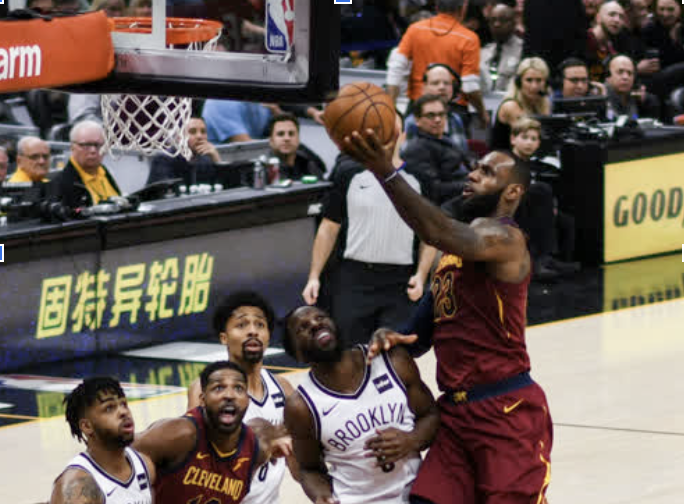

# Multimodal con OpenAI API:

In [ ]:
response = client.responses.create(
    model="gpt-4.1",
    input=[
        {"role": "user", "content": "what teams are playing in this image?"},
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "image_url": "https://ikasten.io/images/basket.jpg"
                }
            ]
        }
    ]
)
# https://upload.wikimedia.org/wikipedia/commons/3/3b/LeBron_James_Layup_%28Cleveland_vs_Brooklyn_2018%29.jpg
print(response.output_text)

The teams playing in this image are the Cleveland Cavaliers (in wine/maroon uniforms) and the Brooklyn Nets (in white uniforms).


# Function Calling en OpenAI

Los modelos actuales tienen soporte de Function Calling. Esto permite que los agentes de puedan ejecutar funciones externas de manera estructurada y controlada, extendiendo sus capacidades más allá de la generación de texto.

Veamos un ejemplo con los modelos de OpenAI: https://platform.openai.com/docs/guides/function-calling

In [ ]:
import json

# Definir el mensaje inicial
input_messages = [
    {"role": "user", "content": "What is the weather like in Paris today?"}]

# Definir la herramienta/función get_weather
tools = [{
    "type": "function",
    "name": "get_weather",
    "description": "Get current temperature for a given location.",
    "parameters": {
        "type": "object",
        "properties": {
            "location": {
                "type": "string",
                "description": "City and country e.g. Bogotá, Colombia"
            }
        },
        "required": ["location"],
        "additionalProperties": False
    }
}]

# Paso 1: Llamar al modelo con la función definida
response = client.responses.create(
    model="gpt-4.1",
    input=input_messages,
    tools=tools
)

# Imprimir la salida inicial
print("Respuesta inicial del modelo:")
print(response.output)

# Output esperado:
# [{
#     "type": "function_call",
#     "id": "fc_12345xyz",
#     "call_id": "call_12345xyz",
#     "name": "get_weather",
#     "arguments": "{\"location\":\"Paris, France\"}"
# }]


def get_weather(location):
    """Función simulada para obtener el clima de una ubicación"""
    # En una aplicación real, aquí harías una llamada a una weather API
    weather_data = {
        "Paris, France": {"temperature": 14, "conditions": "cloudy"},
        "Bogotá, Colombia": {"temperature": 18, "conditions": "rainy"},
        "Tokyo, Japan": {"temperature": 10, "conditions": "sunny"}
    }

    if location in weather_data:
        temp = weather_data[location]["temperature"]
        temp_f = (temp * 9/5) + 32
        return f"The current temperature is {temp}°C ({temp_f:.1f}°F)"
    else:
        return f"Weather data not available for {location}"


# Paso 3: Ejecutar el código de la función
# Procesar las llamadas a funciones en la respuesta
for tool_call in response.output:
    if tool_call.type == "function_call":
        # Parsear los argumentos
        args = json.loads(tool_call.arguments)

        # Ejecutar la función
        result = get_weather(args["location"])

        # Agregar la llamada a función a los mensajes
        input_messages.append(tool_call)

        # Agregar el resultado de la función
        input_messages.append({
            "type": "function_call_output",
            "call_id": tool_call.call_id,
            "output": str(result)
        })

# Paso 4: Enviar los resultados de vuelta al modelo
response_2 = client.responses.create(
    model="gpt-4.1",
    input=input_messages,
    tools=tools
)

# Paso 5: El modelo responde incorporando el resultado
print("\nRespuesta final del modelo:")
print(response_2.output_text)

Respuesta inicial del modelo:
[ResponseFunctionToolCall(arguments='{"location":"Paris, France"}', call_id='call_nYqk3G7COtajEQg6yC1a4qnd', name='get_weather', type='function_call', id='fc_0893def5beff58bc006925c45590648191851f39d3716c45da', status='completed')]

Respuesta final del modelo:
The weather in Paris today is 14°C (57.2°F). If you need more details, like if it's sunny or rainy, let me know!


# Function calling (función real para obtener la temperatura de una localidad)

In [ ]:
import json
import requests

# Inicializar el cliente

client = OpenAI(

)


# Definir el mensaje inicial
input_messages = [
    {"role": "user", "content": "What is the weather like in Paris today?"}]

# Definir la herramienta/función get_weather
tools = [{
    "type": "function",
    "name": "get_weather",
    "description": "Get current temperature for provided coordinates in celsius.",
    "parameters": {
        "type": "object",
        "properties": {
            "latitude": {
                "type": "number",
                "description": "Latitude coordinate (e.g. 48.8566 for Paris)"
            },
            "longitude": {
                "type": "number",
                "description": "Longitude coordinate (e.g. 2.3522 for Paris)"
            }
        },
        "required": ["latitude", "longitude"],
        "additionalProperties": False
    }
}]

# Paso 1: Llamar al modelo con la función definida
response = client.responses.create(
    model="gpt-4.1",
    input=input_messages,
     max_output_tokens=1_000,
    tools=tools
)

# Imprimir la salida inicial
print("Respuesta inicial del modelo:")
# print(response.output)
print(response.model_dump_json(indent=2))

# Función real para obtener el tiempo en una localidad usando la API de Open-Meteo


def get_weather(latitude, longitude):
    """Obtiene la temperatura actual usando la API de Open-Meteo"""
    response = requests.get(
        f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
    )
    data = response.json()
    temp_c = data['current']['temperature_2m']
    temp_f = (temp_c * 9/5) + 32
    return f"The current temperature is {temp_c}°C ({temp_f:.1f}°F)"


# Paso 3: Ejecutar el código de la función
# Procesar las llamadas a funciones en la respuesta
for tool_call in response.output:
    if tool_call.type == "function_call":
        # Parsear los argumentos
        args = json.loads(tool_call.arguments)

        # Ejecutar la función
        result = get_weather(args["latitude"], args["longitude"])

        # Agregar la llamada a función a los mensajes
        input_messages.append(tool_call)

        # Agregar el resultado de la función
        input_messages.append({
            "type": "function_call_output",
            "call_id": tool_call.call_id,
            "output": str(result)
        })

# Paso 4: Enviar los resultados de vuelta al modelo
response_2 = client.responses.create(
    model="gpt-4.1",
    input=input_messages,
    tools=tools
)

# Paso 5: El modelo responde incorporando el resultado
print("\nRespuesta final del modelo:")
print(response_2.output_text)

Respuesta inicial del modelo:
{
  "id": "resp_0e1745bd9ff8bf61006925c4736d9881a3952ad2459deb7557",
  "created_at": 1764082803.0,
  "error": null,
  "incomplete_details": null,
  "instructions": null,
  "metadata": {},
  "model": "gpt-4.1-2025-04-14",
  "object": "response",
  "output": [
    {
      "arguments": "{\"latitude\":48.8566,\"longitude\":2.3522}",
      "call_id": "call_CLhvzwDPJujkTZ3DNkLv2O0M",
      "name": "get_weather",
      "type": "function_call",
      "id": "fc_0e1745bd9ff8bf61006925c4743be481a38d3f62832b21a989",
      "status": "completed"
    }
  ],
  "parallel_tool_calls": true,
  "temperature": 1.0,
  "tool_choice": "auto",
  "tools": [
    {
      "name": "get_weather",
      "parameters": {
        "type": "object",
        "properties": {
          "latitude": {
            "type": "number",
            "description": "Latitude coordinate (e.g. 48.8566 for Paris)"
          },
          "longitude": {
            "type": "number",
            "description": 

# Mejorando el ejemplo (I)

En el ejemplo anterior, no entramos en un bucle (solo hay una llamada a la función de obtener temperatura de París...) Y solo gestionamos una llamada a tool. Nos gustaría programar un bucle donde el chatbot pregunte al usuario qué quiere hacer, hasta que decida parar. **Además, queremos ver cómo gestionar múltiples llamadas a funciones en un único prompt.**  Empecemos por esto último.

In [ ]:
# Inicializar el cliente

client = OpenAI(

)


# Definir el mensaje inicial que requiere múltiples funciones
input_messages = [{
    "role": "user",
    "content": "What's the weather in Paris and Bogotá? Also send an email to bob@email.com with the results."
}]

# Definir múltiples herramientas
tools = [
    {
        "type": "function",
        "name": "get_weather",
        "description": "Get current temperature for provided coordinates in celsius.",
        "parameters": {
            "type": "object",
            "properties": {
                "latitude": {
                    "type": "number",
                    "description": "Latitude coordinate (e.g. 48.8566 for Paris)"
                },
                "longitude": {
                    "type": "number",
                    "description": "Longitude coordinate (e.g. 2.3522 for Paris)"
                }
            },
            "required": ["latitude", "longitude"],
            "additionalProperties": False
        }
    },
    {
        "type": "function",
        "name": "send_email",
        "description": "Send an email to a recipient with weather information",
        "parameters": {
            "type": "object",
            "properties": {
                "to": {
                    "type": "string",
                    "description": "Email address of the recipient"
                },
                "subject": {
                    "type": "string",
                    "description": "Subject of the email"
                },
                "body": {
                    "type": "string",
                    "description": "Body of the email with weather information"
                }
            },
            "required": ["to", "subject", "body"],
            "additionalProperties": False
        }
    }
]

# Paso 1: Llamar al modelo con las funciones definidas
response = client.responses.create(
    model="gpt-4.1",
    input=input_messages,
    tools=tools
)

# Imprimir la salida inicial
print("Respuesta inicial del modelo:")
print(response.model_dump_json(indent=2))
# print(response.output)

# Función real para obtener el clima usando la API de Open-Meteo


def get_weather(latitude, longitude):
    """Obtiene la temperatura actual usando la API de Open-Meteo"""
    try:
        response = requests.get(
            f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
        )
        data = response.json()
        temp_c = data['current']['temperature_2m']
        temp_f = (temp_c * 9/5) + 32
        return f"Temperature: {temp_c}°C ({temp_f:.1f}°F)"
    except Exception as e:
        return f"Error getting weather: {str(e)}"

# Función simulada para enviar email


def send_email(to, subject, body):
    """Simula el envío de un email"""
    # En una aplicación real, aquí se implementaría el envío real del email
    print(f"Email sent to {to}\nSubject: {subject}\nBody: {body}")
    return f"Email sent to {to}\nSubject: {subject}\nBody: {body}"

# Función para manejar las llamadas a funciones


def call_function(name, args):
    """Procesa una llamada a función y retorna su resultado"""
    if name == "get_weather":
        return get_weather(**args)
    elif name == "send_email":
        return send_email(**args)
    else:
        return f"Error: Function {name} not implemented"


# Paso 2: Procesar las llamadas a funciones y obtener respuesta final
while True:
    # Procesar las llamadas a funciones en la respuesta actual
    for tool_call in response.output:
        if tool_call.type != "function_call":
            continue

        name = tool_call.name
        args = json.loads(tool_call.arguments)

        print("Calling: ", name)
        # Ejecutar la función y obtener el resultado
        result = call_function(name, args)

        # Agregar la llamada a función y su resultado a los mensajes
        input_messages.append(tool_call)
        input_messages.append({
            "type": "function_call_output",
            "call_id": tool_call.call_id,
            "output": str(result)
        })

    print("\nObteniendo siguiente acción...")
    # Obtener nueva respuesta del modelo
    response = client.responses.create(
        model="gpt-4.1",
        input=input_messages,
        tools=tools
    )

    # Si no hay más llamadas a funciones, salir del bucle
    if not response.output or all(call.type != "function_call" for call in response.output):
        break

# La última respuesta contiene el texto final del modelo
print("\nRespuesta final del modelo:")
print(response.output_text)

Respuesta inicial del modelo:
{
  "id": "resp_0ec1346fa606b0de006925c4a3ec48819c910360db882c3314",
  "created_at": 1764082851.0,
  "error": null,
  "incomplete_details": null,
  "instructions": null,
  "metadata": {},
  "model": "gpt-4.1-2025-04-14",
  "object": "response",
  "output": [
    {
      "arguments": "{\"latitude\":48.8566,\"longitude\":2.3522}",
      "call_id": "call_CogGJLtc8x1gPSNxNB6tTfaV",
      "name": "get_weather",
      "type": "function_call",
      "id": "fc_0ec1346fa606b0de006925c4a4b538819ca459832f54c7b2ae",
      "status": "completed"
    },
    {
      "arguments": "{\"latitude\":4.711,\"longitude\":-74.0721}",
      "call_id": "call_Ju45kgnCTI8CuNqYMgPtvfm1",
      "name": "get_weather",
      "type": "function_call",
      "id": "fc_0ec1346fa606b0de006925c4a4ca24819c87c2f254d7829fe6",
      "status": "completed"
    }
  ],
  "parallel_tool_calls": true,
  "temperature": 1.0,
  "tool_choice": "auto",
  "tools": [
    {
      "name": "get_weather",
      "pa

# Ejercicio

<img src="https://ikasten.io/images/ayudaejercicio2.png" width="50%" align="right"> Añade un bucle de conversación al ejercicio anterior para que el usuario pueda introdudir por teclado el nombre de una localidad, el modelo le responda con la temperatura y el usuario pueda volver a preguntar por otra localidad, hasta que teclee "quit" para salir. Deja el resultado en `ejercicio2.py` (y pruébalo, en Colab y en local)

# Built-in tools en OpenAI

OpenAI ofrece algunas tools de serie
https://platform.openai.com/docs/guides/tools?api-mode=responses

In [ ]:
from openai import OpenAI
client = OpenAI(

)

response = client.responses.create(
    model="gpt-4.1",
    max_output_tokens=1_000,
    tools=[{"type": "web_search_preview"}],
    input="¿Qué canciones ha estrenado Matt Berninger (en solitario) en 2025?"
)

print(response.output_text)


En 2025, Matt Berninger, vocalista de The National, lanzó su segundo álbum en solitario titulado "Get Sunk" el 30 de mayo. ([en.wikipedia.org](https://en.wikipedia.org/wiki/Get_Sunk?utm_source=openai)) Este álbum incluye las siguientes canciones:

1. Inland Ocean
2. No Love
3. Bonnet of Pins
4. Frozen Oranges
5. Breaking Into Acting (con Hand Habits)
6. Nowhere Special
7. Little by Little
8. Junk
9. Silver Jeep (con Ronboy)
10. Times of Difficulty

Antes del lanzamiento del álbum, Berninger presentó varios sencillos:

- **"Bonnet of Pins"**: Primer sencillo lanzado el 11 de marzo de 2025. ([consequence.net](https://consequence.net/2025/03/the-nationals-matt-berninger-announces-new-album-get-sunk-2025-tour-dates/?utm_source=openai))

- **"Breaking Into Acting"**: Segundo sencillo, en colaboración con Hand Habits, lanzado el 18 de abril de 2025. ([cultture.com](https://www.cultture.com/matt-berninger-de-the-national-adelanta-su-nuevo-album-en-solitario-con-el-melancolico-sencillo-breakin

Veamos una nueva característica (streaming) que nos vendrá bien con los agentes que tarden mucho tiempo en ejecutarse y planteemos algún ejercicio más.

**Streaming con Responses API**


In [ ]:
from openai import OpenAI
client = OpenAI(
)

stream = client.responses.create(
    model="gpt-4.1", # los llm no se saben muy bien los trabalenguas, pero lo intentan :)
    input=[
        {
            "role": "user",
            "content": "Termina este trabalenguas: el cielo está enladrillado... y escribe después otro que empieza así: Tres tristes tigres...",
        },
    ],
    stream=True,
)

# ResponseTextDeltaEvent(content_index=0, delta='l', item_id='msg_684050b7307481a0a1ba1f55c1c13f8004cda34fc0f79bab',
# output_index=0, sequence_number=25, type='response.output_text.delta')

for event in stream:
    if event.type == "response.output_text.delta":
        print(event.delta, end="", flush=True)



¡Claro!

El trabalenguas completo es:

"El cielo está enladrillado,  
¿quién lo desenladrillará?  
El desenladrillador que lo desenladrille,  
buen desenladrillador será."

Y aquí tienes la continuación de "Tres tristes tigres...":

"Tres tristes tigres tragan trigo en un trigal,  
en un trigal tragan trigo tres tristes tigres."

¿Te gustaría otro trabalenguas?

# Ejercicio 3

<u>Usando el API de Anthropic</u>:

* Crea un Chatbot básico
* Crea una consulta sobre imágenes
* Crea un ejemplo de uso de tools
* Crea un ejemplo de uso de streaming

**Ayuda**

* https://docs.anthropic.com/en/api/overview
* https://docs.anthropic.com/en/docs/agents-and-tools/tool-use/overview


# Ejercicio 4

Modifica el ejercicio que devuelve la temperatura en una ciudad a partir de unas coordenadas GPS para que primero busque las coordenadas a través del Geocoding API Ninjas:
https://api-ninjas.com/api/geocoding .
